# Phase 1: Exploratory Data Analysis and Feature Engineering

This contains the EDA and feature engineering steps for our Ames house price prediction model, where we will create a pipeline that prepares the data for modelling.

## Objectives
1. Analyze dataset quality
2. Clean/process data (missing values, etc.)
3. Engineer relevant features for model training
4. Save created pipelines

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configure plotting style
plt.style.use('seaborn-v0_8')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Display all columns in pandas dataframes
pd.set_option('display.max_columns', None)

## Load/examine data

In [2]:
train_df = pd.read_csv('../data/house-prices-advanced-regression-techniques/train.csv')

print("Dataset Shape:", train_df.shape)
print("\nDataset Info:")
train_df.info()

Dataset Shape: (1460, 81)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual

In [3]:
# summary statistics for numerical columns
numerical_summary: pd.DataFrame = train_df.describe()
print("\nNumerical Features Summary:")
print(numerical_summary)

# summary statistics for categorical columns
categorical_columns = train_df.select_dtypes(include=['object']).columns
categorical_summary = train_df[categorical_columns].describe()
print("\nCategorical Features Summary:")
print(categorical_summary)


Numerical Features Summary:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   

## Feature Analysis

### Target Variable Analysis

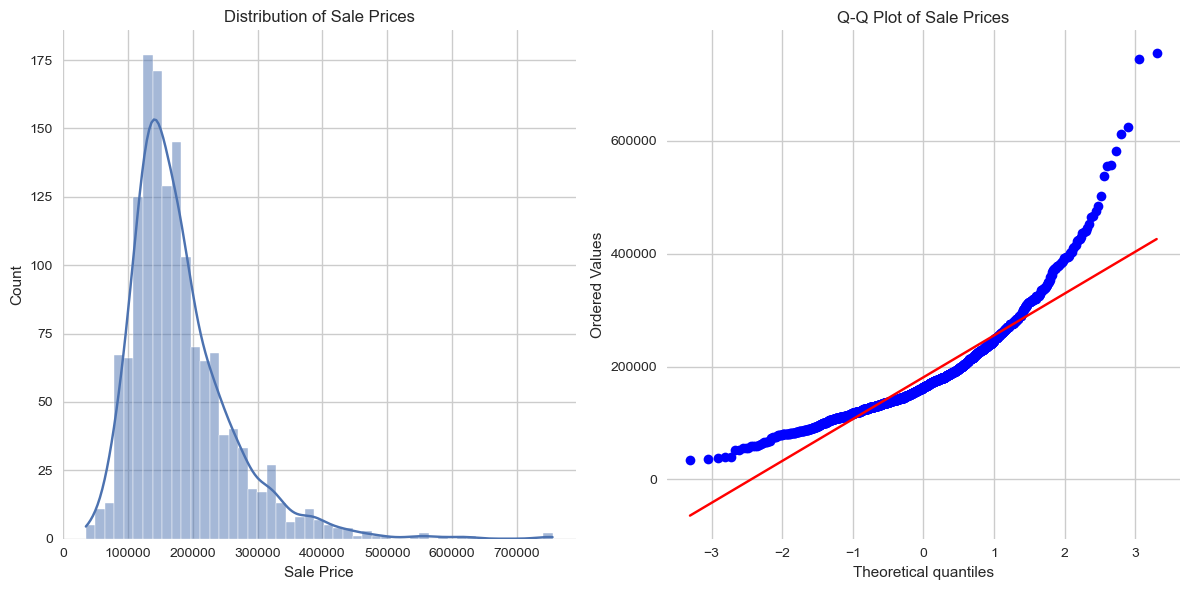


Sale Price Summary Statistics:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [4]:
# Analyze the target variable (SalePrice)
plt.figure(figsize=(12, 6))

# Distribution plot
plt.subplot(1, 2, 1)
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(train_df['SalePrice'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Sale Prices')

plt.tight_layout()
plt.show()

# Print summary statistics of SalePrice
print("\nSale Price Summary Statistics:")
print(train_df['SalePrice'].describe())

### Numerical Features Analysis


Top 10 Numerical Features Correlation with SalePrice:


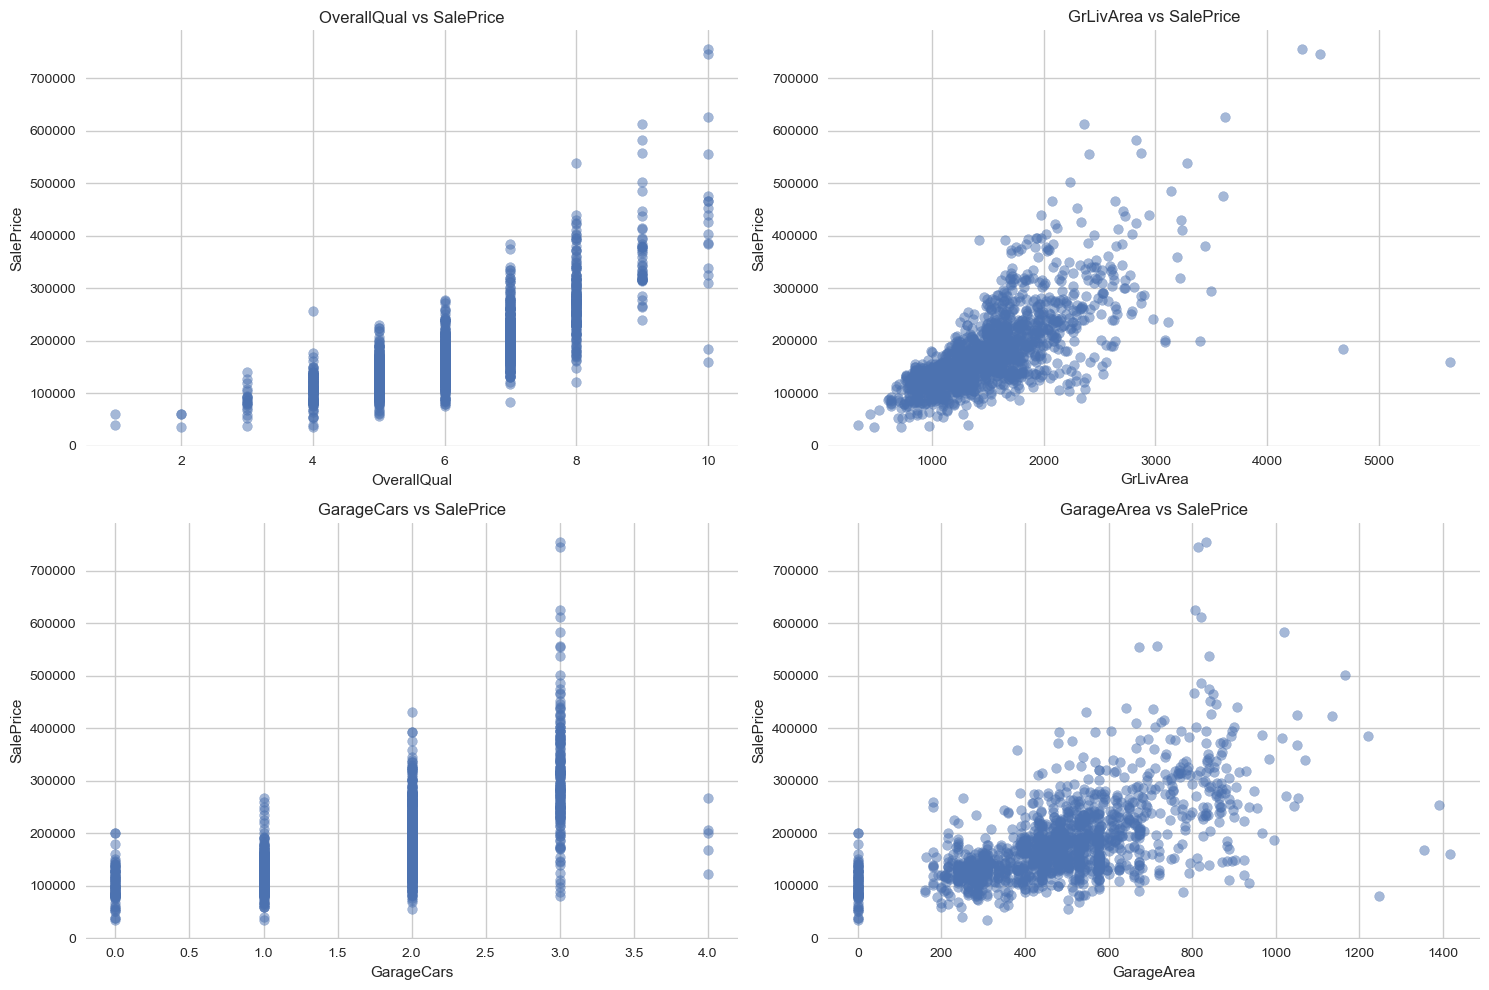

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
dtype: float64


In [5]:
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')

# Calculate correlation with SalePrice
corr_with_price = train_df[numerical_features].corrwith(train_df['SalePrice']).sort_values(ascending=False)
print("\nTop 10 Numerical Features Correlation with SalePrice:")

# plot top numerical features vs SalePrice
plt.figure(figsize=(15, 10))
for i, feature in enumerate(corr_with_price.keys()[:4], 1):
    plt.subplot(2, 2, i)
    plt.scatter(train_df[feature], train_df['SalePrice'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(f'{feature} vs SalePrice')
plt.tight_layout()
plt.show()

print(corr_with_price.head(10))

### Categorical Features Analysis

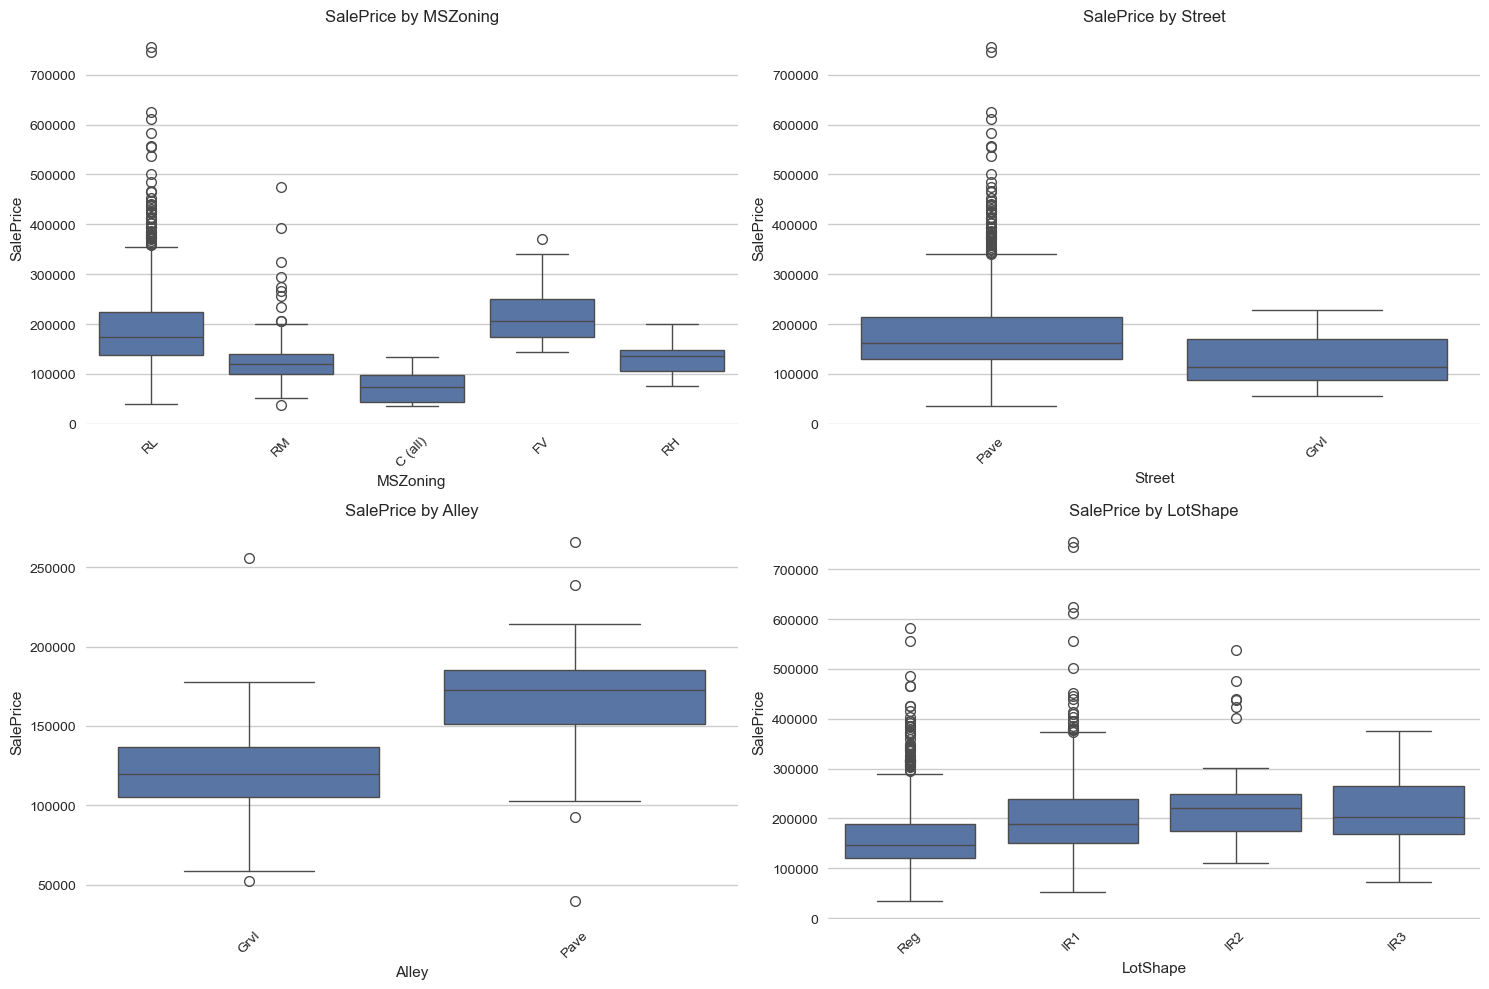


Average SalePrice by MSZoning:
                   mean  count
MSZoning                      
FV        214014.061538     65
RL        191004.994787   1151
RH        131558.375000     16
RM        126316.830275    218
C (all)    74528.000000     10

Average SalePrice by Street:
                 mean  count
Street                      
Pave    181130.538514   1454
Grvl    130190.500000      6

Average SalePrice by Alley:
                mean  count
Alley                      
Pave   168000.585366     41
Grvl   122219.080000     50

Average SalePrice by LotShape:
                   mean  count
LotShape                      
IR2       239833.365854     41
IR3       216036.500000     10
IR1       206101.665289    484
Reg       164754.818378    925


In [6]:
categorical_features = train_df.select_dtypes(include=['object']).columns

# Plot box plots for top categorical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features[:4], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=feature, y='SalePrice', data=train_df)
    plt.xticks(rotation=45)
    plt.title(f'SalePrice by {feature}')
plt.tight_layout()
plt.show()

# Calculate average price for each category in selected features
for feature in categorical_features[:4]:
    avg_price = train_df.groupby(feature)['SalePrice'].agg(['mean', 'count']).sort_values('mean', ascending=False)
    print(f"\nAverage SalePrice by {feature}:")
    print(avg_price)

## Correlation Analysis

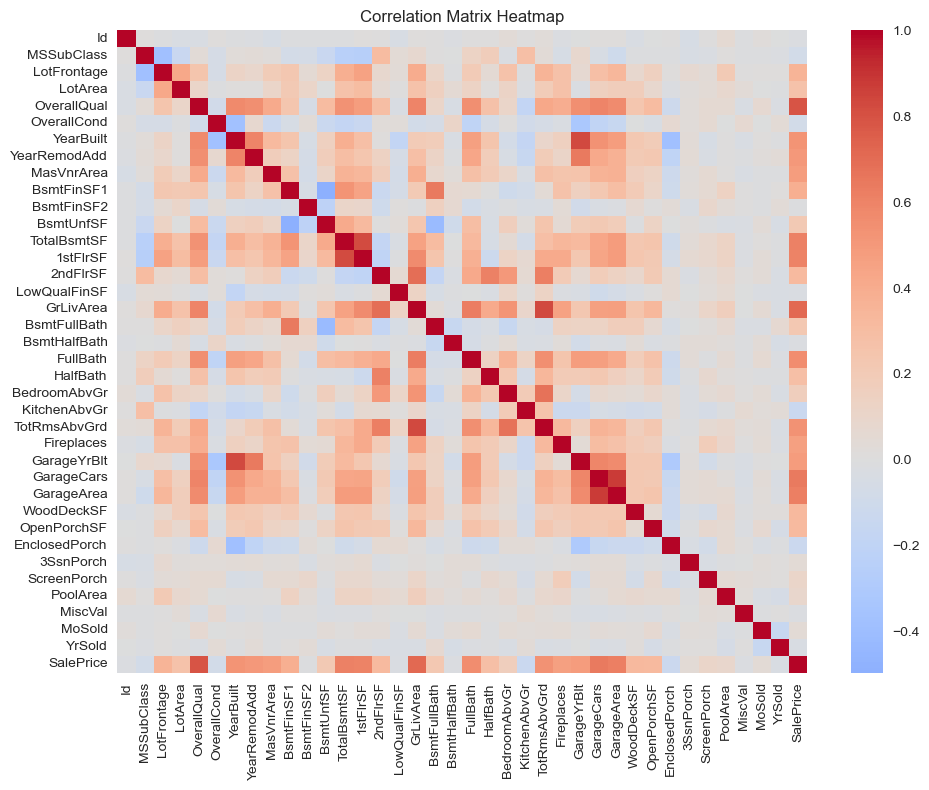


Highly correlated feature pairs (correlation > 0.7):
GarageCars -- GarageArea: 0.88
YearBuilt -- GarageYrBlt: 0.83
GrLivArea -- TotRmsAbvGrd: 0.83
TotalBsmtSF -- 1stFlrSF: 0.82
OverallQual -- SalePrice: 0.79
GrLivArea -- SalePrice: 0.71


In [7]:
correlation_matrix = train_df.select_dtypes(include=['int64', 'float64']).corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Find highly correlated features
threshold = 0.7
low_corr = np.where(np.abs(correlation_matrix) > threshold)
low_corr = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y]) 
             for x, y in zip(*low_corr) if x != y and x < y]
low_corr.sort(key = lambda x: x[2], reverse=True)

print("\nHighly correlated feature pairs (correlation > 0.7):")
for feat1, feat2, corr in low_corr:
    print(f"{feat1} -- {feat2}: {corr:.2f}")

## Missing values

Number of duplicate rows: 0

Missing Values Analysis:
              Missing Values  Percentage
PoolQC                  1453   99.520548
MiscFeature             1406   96.301370
Alley                   1369   93.767123
Fence                   1179   80.753425
MasVnrType               872   59.726027
FireplaceQu              690   47.260274
LotFrontage              259   17.739726
GarageType                81    5.547945
GarageYrBlt               81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
GarageCond                81    5.547945
BsmtFinType2              38    2.602740
BsmtExposure              38    2.602740
BsmtFinType1              37    2.534247
BsmtCond                  37    2.534247
BsmtQual                  37    2.534247
MasVnrArea                 8    0.547945
Electrical                 1    0.068493


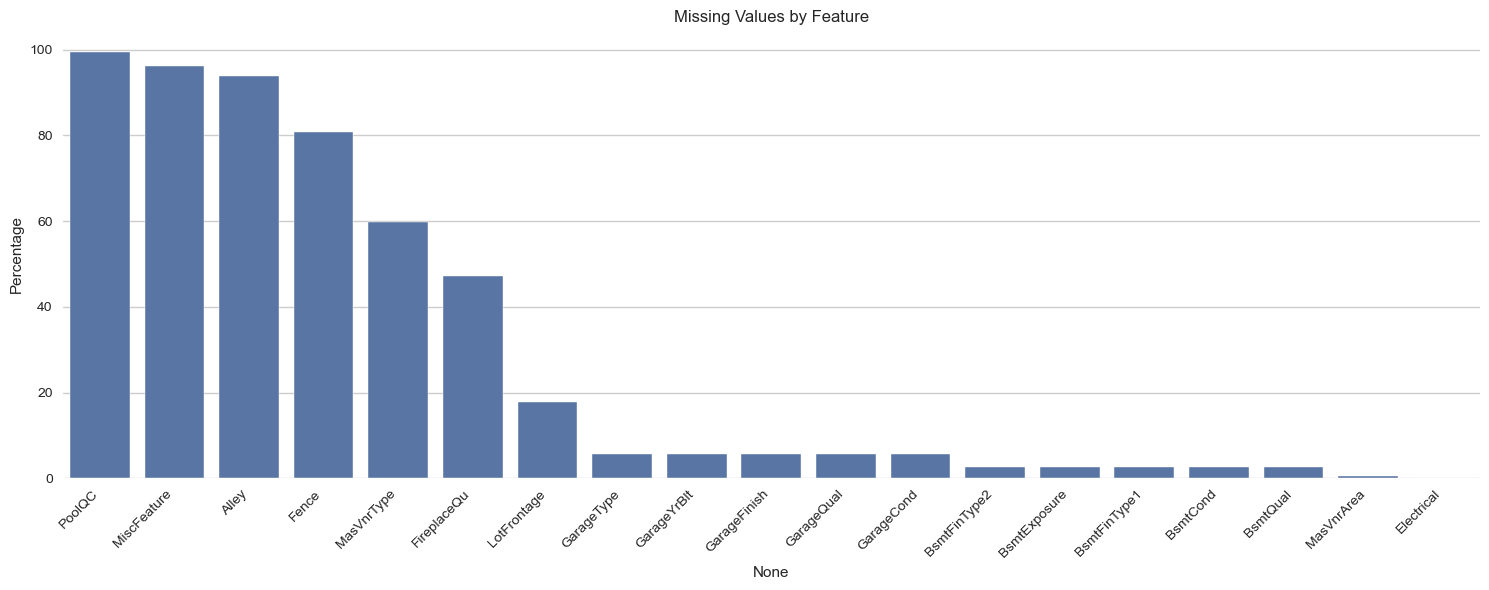

In [8]:
# Check for duplicates
print("Number of duplicate rows:", train_df.duplicated().sum())

# Check for missing values
missing_values = train_df.isnull().sum()
missing_percent = (missing_values / len(train_df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values('Missing Values', ascending=False)
print("\nMissing Values Analysis:")
print(missing_data)

# Create a visualization of missing values
plt.figure(figsize=(15, 6))
sns.barplot(x=missing_data.index, y=missing_data['Percentage'])
plt.xticks(rotation=45, ha='right')
plt.title('Missing Values by Feature')
plt.tight_layout()
plt.show()

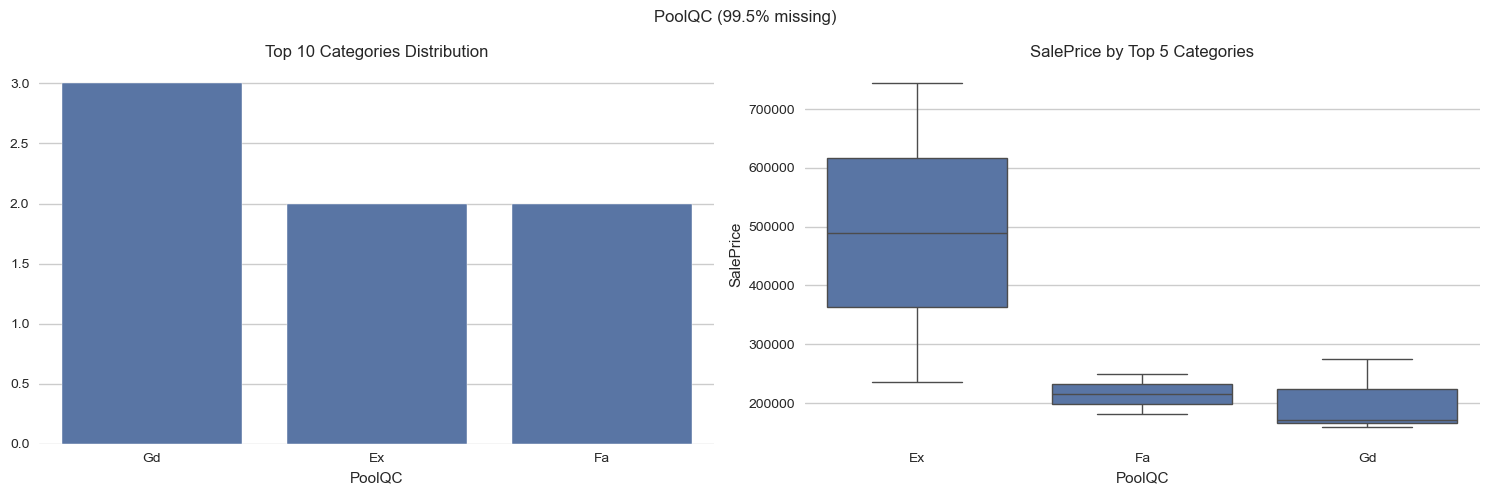

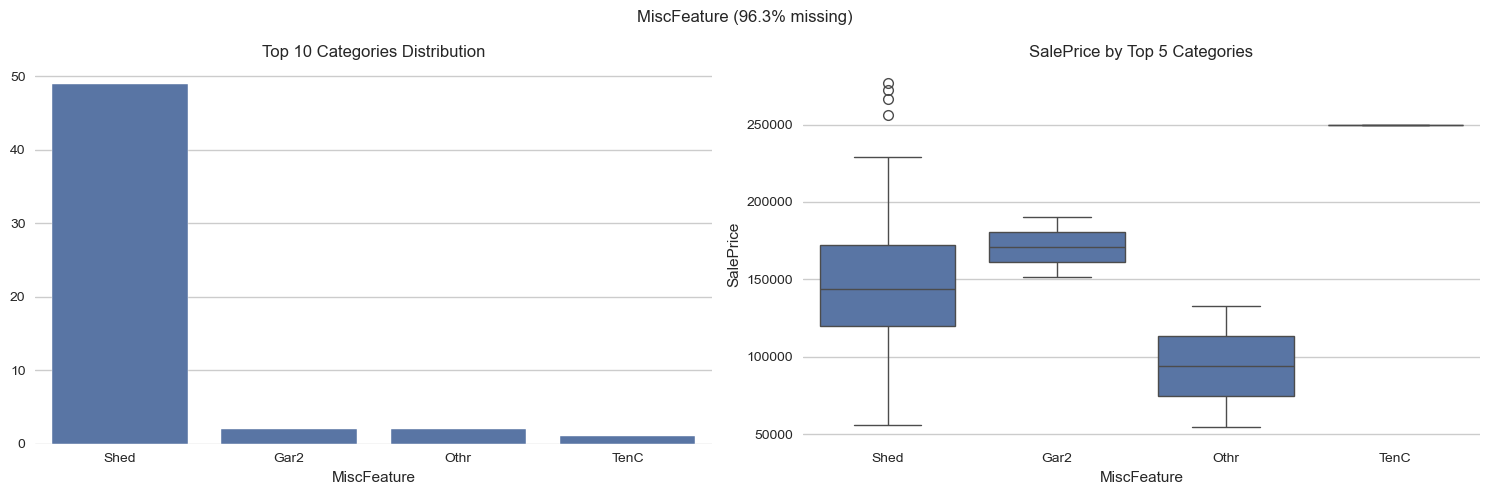

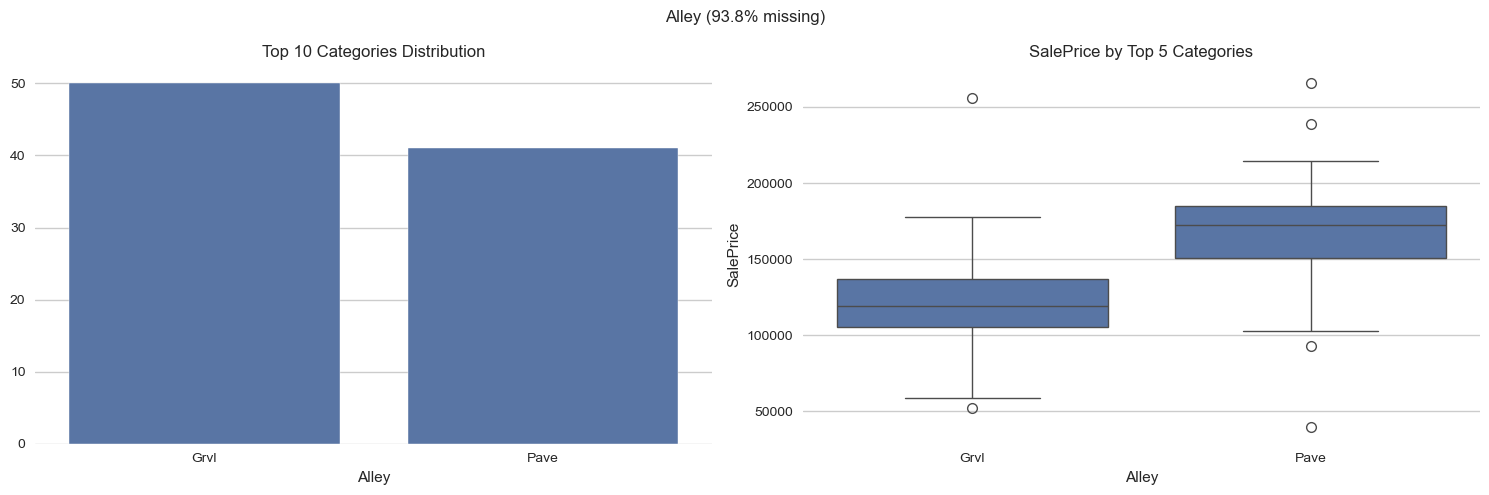

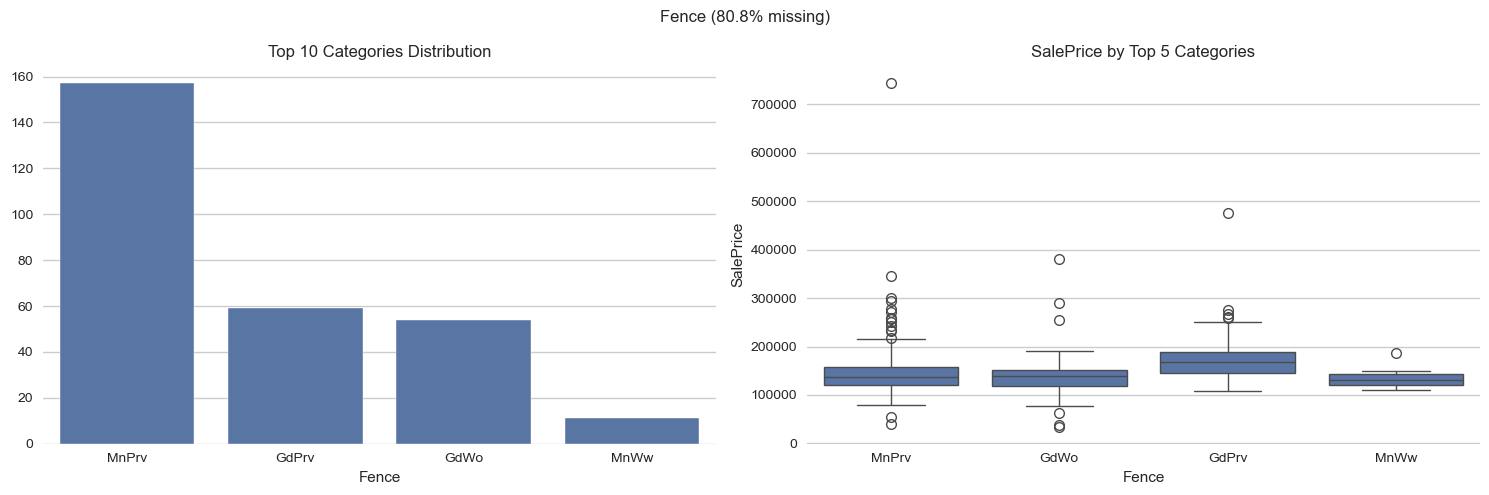

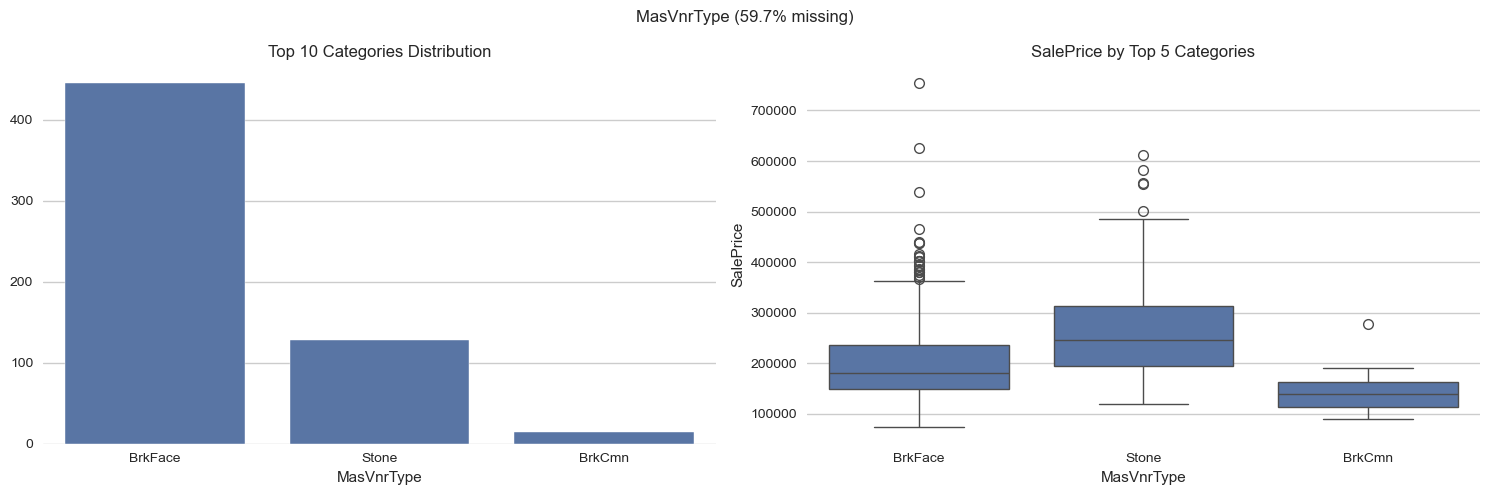

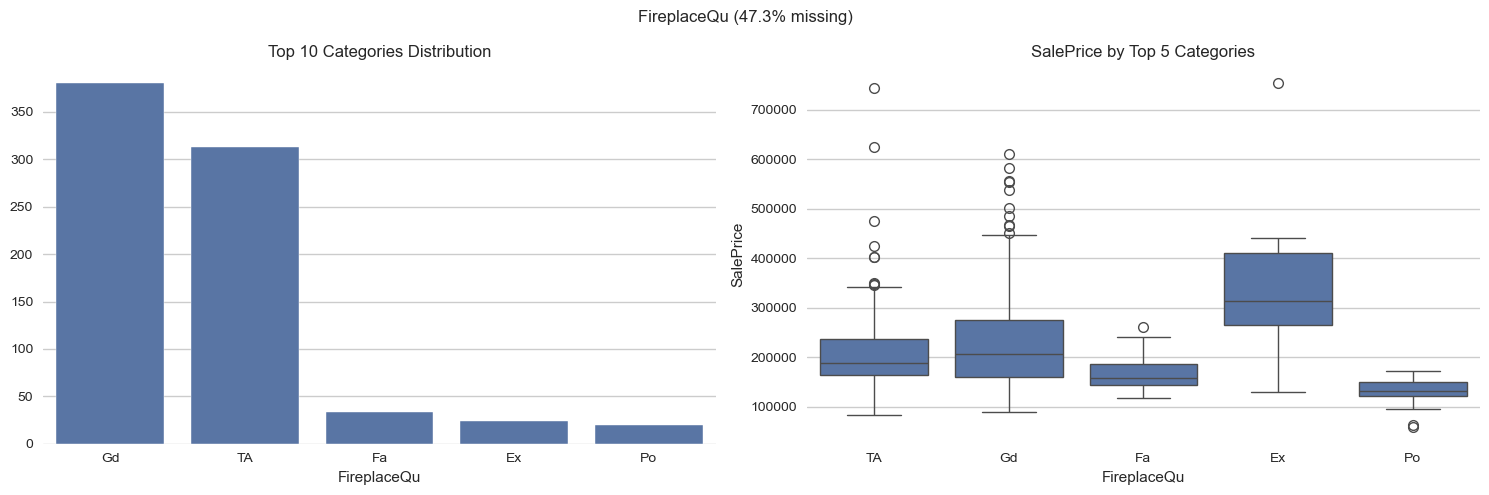

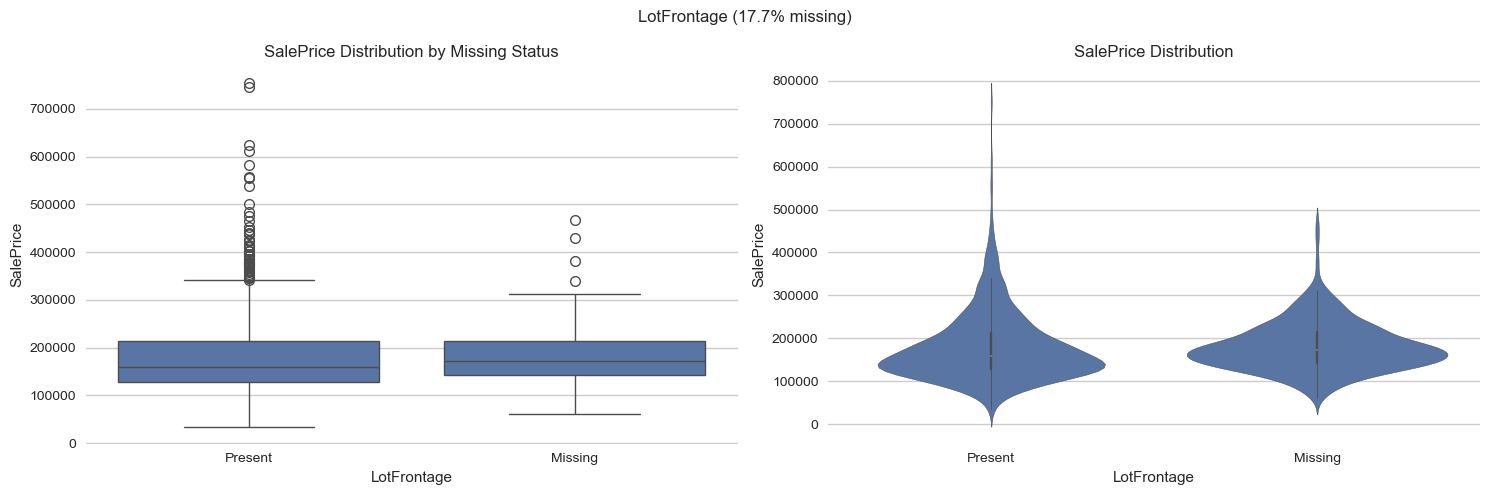

In [9]:
def plot_missing_distributions(df: pd.DataFrame, feature: str):
    if df[feature].isnull().sum() > 0:
        total_missing = df[feature].isnull().sum()
        missing_percentage = (total_missing / len(df)) * 100
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        fig.suptitle(f'{feature} ({missing_percentage:.1f}% missing)', fontsize=12)
        
        # numerical features
        if df[feature].dtype in ['int64', 'float64']:
            # box plot of SalePrice for missing vs non-missing values
            missing_mask = df[feature].isnull()
            sns.boxplot(x=missing_mask, y='SalePrice', data=df, ax=axes[0])
            axes[0].set_xticks(axes[0].get_xticks())
            axes[0].set_xticklabels(['Present', 'Missing'])
            axes[0].set_title('SalePrice Distribution by Missing Status')
            
            # violin plot
            sns.violinplot(x=missing_mask, y='SalePrice', data=df, ax=axes[1])
            axes[1].set_xticks(axes[1].get_xticks())
            axes[1].set_xticklabels(['Present', 'Missing'])
            axes[1].set_title('SalePrice Distribution')
        
        # categorical features
        if df[feature].dtype == 'object':
            # bar plot of value distribution
            value_counts = df[feature].value_counts()
            sns.barplot(x=value_counts.index[:10], y=value_counts.values[:10], ax=axes[0])
            axes[0].set_title('Top 10 Categories Distribution')
            
            # box plot of SalePrice by top categories
            top_categories = value_counts.index[:5]
            plot_data = df[df[feature].isin(top_categories)]
            sns.boxplot(x=feature, y='SalePrice', data=plot_data, ax=axes[1])
            axes[1].set_title('SalePrice by Top 5 Categories')
        
        plt.tight_layout()
        plt.show()

# only do features with > 10% missing values
features_to_analyze = missing_data[missing_data['Percentage'] > 10].index
for feature in features_to_analyze:
    plot_missing_distributions(train_df, feature)

## Feature Engineering

Based on our analysis and domain knowledge from the data description, we'll create new features that might be useful for predicting house prices. We will also drop the columns that become redundant after the new features are created.

In [10]:
df_engineered = train_df.copy()

# Total Square Footage
df_engineered['TotalSF'] = df_engineered['GrLivArea'] + df_engineered['TotalBsmtSF']
df_engineered.drop(['GrLivArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
                    'TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)

# Total Bathrooms
df_engineered['TotalBathrooms'] = df_engineered['FullBath'] + df_engineered['BsmtFullBath'] + \
                                 0.5 * (df_engineered['HalfBath'] + df_engineered['BsmtHalfBath'])
df_engineered.drop(['FullBath', 'BsmtFullBath', 'HalfBath', 'BsmtHalfBath'], axis=1, inplace=True)

# Has Fireplace
df_engineered['HasFireplace'] = (train_df['Fireplaces'] > 0).astype(int)
df_engineered.drop(['Fireplaces'], axis=1, inplace=True)

# drop poorly correlated values
df_engineered.drop(['PoolQC', 'Alley', 'Fence'], axis=1, inplace=True)

# get correlations of new features with SalePrice
new_features = [feature for feature in df_engineered.columns if feature not in train_df.columns]
correlations = df_engineered[new_features].corrwith(df_engineered['SalePrice']).sort_values(ascending=False)
dropped_features = [feature for feature in train_df.columns if feature not in df_engineered]
dropped_correlations = train_df[dropped_features].corrwith(train_df['SalePrice'], numeric_only=True).sort_values(ascending=False)

print(f"Shape of dataset was {train_df.shape}, is now {df_engineered.shape}")
print("Correlation of new features with SalePrice:")
print(correlations)
print("Correlation of dropped features with SalePrice:")
print(dropped_correlations)

Shape of dataset was (1460, 81), is now (1460, 68)
Correlation of new features with SalePrice:
TotalSF           0.778959
TotalBathrooms    0.631731
HasFireplace      0.471908
dtype: float64
Correlation of dropped features with SalePrice:
GrLivArea       0.708624
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
Fireplaces      0.466929
BsmtFinSF1      0.386420
2ndFlrSF        0.319334
HalfBath        0.284108
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BsmtFinSF2     -0.011378
BsmtHalfBath   -0.016844
LowQualFinSF   -0.025606
dtype: float64


## Data Preprocessing Strategy

Based on our analysis, we will do the following preprocessing:

- **Missing Value Treatment**:
   - Numerical features: Impute with median for features like LotFrontage
   - Categorical features: Impute with mode or create a new category 'Missing'

- **Feature Transformation**:
   - Apply log transformation to SalePrice (target variable) to handle skewness
   - Scale numerical features using StandardScaler
   - Encode categorical variables

- **Feature Selection**:
   - Remove highly correlated features
   - Keep engineered features that show strong correlation with target
   - Remove features with too many missing values

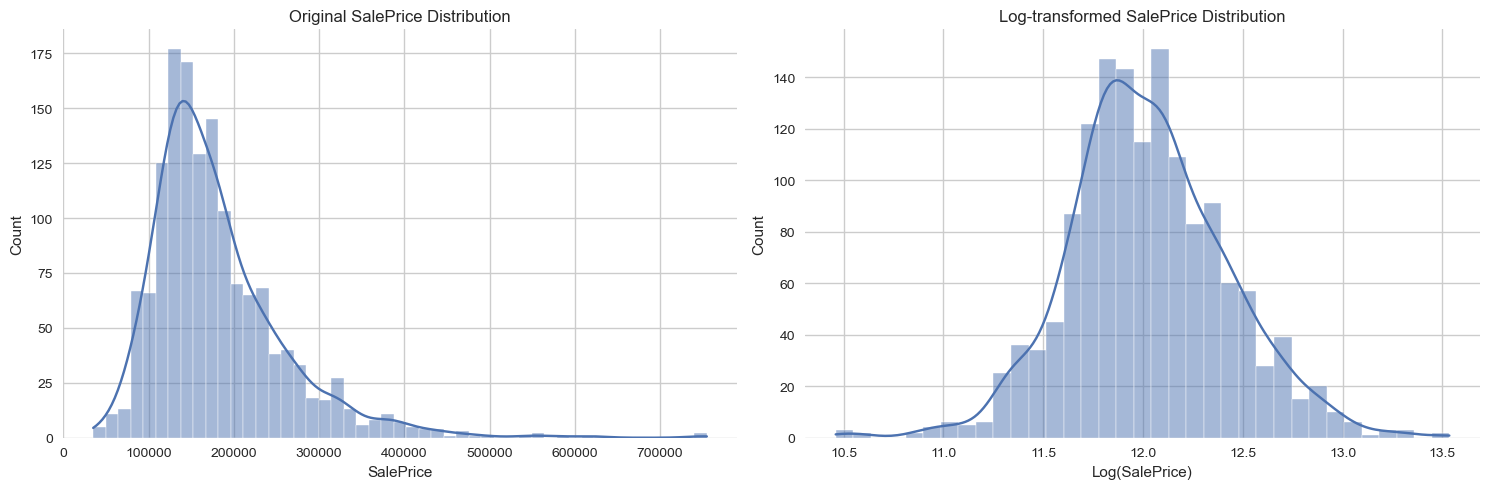

Skewness before transformation: 1.8828757597682129
Skewness after transformation: 0.12134661989685329


In [11]:
# Example of log transformation of target variable
import numpy as np

# Plot original vs transformed target variable
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Original distribution
sns.histplot(train_df['SalePrice'], kde=True, ax=ax1)
ax1.set_title('Original SalePrice Distribution')
ax1.set_xlabel('SalePrice')

# Log-transformed distribution
log_price = np.log1p(train_df['SalePrice'])
sns.histplot(log_price, kde=True, ax=ax2)
ax2.set_title('Log-transformed SalePrice Distribution')
ax2.set_xlabel('Log(SalePrice)')

plt.tight_layout()
plt.show()

# Print skewness before and after transformation
print("Skewness before transformation:", train_df['SalePrice'].skew())
print("Skewness after transformation:", log_price.skew())

## Create and Save Preprocessing Pipeline

For MLOps best practices, we'll create a scikit-learn pipeline that encapsulates all our preprocessing steps. This ensures:
1. Consistent preprocessing between training and inference
2. No data leakage
3. Easy integration with MLflow for experiment tracking
4. Reproducible transformations in production

In [12]:
# Save custom tranformer code
custom_transformer_code = '''from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, df: pd.DataFrame):
        df = df.copy()
        # Total Square Footage
        df['TotalSF'] = df['GrLivArea'] + df['TotalBsmtSF']
        df.drop(['GrLivArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
                'TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)
        
        # Total Bathrooms
        df['TotalBathrooms'] = df['FullBath'] + df['BsmtFullBath'] + \\
            0.5 * (df['HalfBath'] + df['BsmtHalfBath'])
        df.drop(['FullBath', 'BsmtFullBath', 'HalfBath', 'BsmtHalfBath'], axis=1, inplace=True)

        # Has Fireplace
        df['HasFireplace'] = (df['Fireplaces'] > 0).astype(int)
        df.drop(['Fireplaces'], axis=1, inplace=True)

        # drop poorly correlated values
        df.drop(['PoolQC', 'Alley', 'Fence'], axis=1, inplace=True)

        return df
    

# transformer for target variable SalePrice
import numpy as np
class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, y):
        return self

    def transform(self, y):
        y = np.asarray(y)
        return np.log1p(y)

    def inverse_transform(self, y):
        y = np.asarray(y)
        return np.expm1(y)
'''

# ensure models directory exists
models_dir = "../models"
import os
os.makedirs(models_dir, exist_ok=True)
with open(f'{models_dir}/custom_transformers.py', 'w+') as f:
    f.write(custom_transformer_code)

print(f"Feature engineering class saved to {models_dir}/custom_transformers.py")

Feature engineering class saved to ../models/custom_transformers.py


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib

# import custom transformers
import os, sys
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
from models.custom_transformers import FeatureEngineer, LogTransformer

# Separate features by type
numeric_features = df_engineered.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')
categorical_features = df_engineered.select_dtypes(include=['object']).columns
engineered_features = [feature for feature in df_engineered.columns if feature not in train_df.columns]

# Create preprocessing pipelines for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', scaler := StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', encoder := OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

# Create feature preprocessing pipeline
feature_preprocessor = Pipeline([
    ('feature_engineer', FeatureEngineer()),
    ('column_transformer', ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    )])

# Create target transformer
target_transformer = LogTransformer()

# Document the preprocessing steps
preprocessing_doc = {
    'numeric_features': list(numeric_features),
    'categorical_features': list(categorical_features),
    'engineered_features': engineered_features,
    'target_transformation': 'log1p',
    'scaling': type(scaler).__name__,
    'categorical_encoding': type(encoder).__name__,
    'pipeline_steps': [
        'feature_engineering',
        'column_transformer [numeric_imputer, numeric_scaler, categorical_imputer, categorical_encoder]',
        'target_transformation [log1p]'
    ]
}

# Save preprocessing documentation
import json
with open(f'{models_dir}/preprocessing_steps.json', 'w') as f:
    json.dump(preprocessing_doc, f, indent=4)

print(f"\nPreprocessing documentation saved to {models_dir}/preprocessing_steps.json")


Preprocessing documentation saved to ../models/preprocessing_steps.json


In [14]:
# fit preprocessor
print("Fitting preprocessors...")
feature_preprocessor.fit(train_df)
target_transformer.fit(train_df['SalePrice'])

# sanity check
print("\nValidating transformations...")
X = train_df.copy()
y = X.pop('SalePrice')
X_transformed = feature_preprocessor.transform(X.head())
y_transformed = target_transformer.transform(y.head())
print("Shape of transformed features:", X_transformed.shape)
print("Shape of transformed target:", y_transformed.shape)

# sanity check on target (inversion)
y_reconstructed = target_transformer.inverse_transform(y_transformed)
print("\nFirst 5 values:")
print("Original:", y.head().values)
print("Transformed:", y_transformed)
print("Reconstructed:", y_reconstructed)

# save fitted preprocessors
joblib.dump(feature_preprocessor, f"{models_dir}/feature_preprocessor.joblib")
joblib.dump(target_transformer, f"{models_dir}/target_transformer.joblib")
print(f"Saved preprocessing pipelines to {models_dir}/")

# Show transformed feature names
if False:
    processed_df = pd.DataFrame(X_transformed, columns=feature_preprocessor[1:].get_feature_names_out())
    print("\nTransformed feature names:")
    for col in processed_df.columns.sort_values():
        print(col)

Fitting preprocessors...

Validating transformations...
Shape of transformed features: (5, 242)
Shape of transformed target: (5,)

First 5 values:
Original: [208500 181500 223500 140000 250000]
Transformed: [12.24769912 12.10901644 12.31717117 11.84940484 12.4292202 ]
Reconstructed: [208500. 181500. 223500. 140000. 250000.]
Saved preprocessing pipelines to ../models/
